In [6]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [7]:
# Load dataset (example: Pima Indians Diabetes Dataset)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, names=columns)

In [8]:
# Data preprocessing

# Replace 0s with NaN for appropriate columns where 0 is not a valid value
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[columns_with_zeros] = data[columns_with_zeros].replace(0, pd.NA)

# Handle missing values
data.dropna(inplace=True)  # Drop rows with missing values

# Ensure the target variable is binary (0 or 1)
data["Outcome"] = data["Outcome"].astype(int)

# Split data into features (X) and target (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8354430379746836
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        53
           1       0.76      0.73      0.75        26

    accuracy                           0.84        79
   macro avg       0.82      0.81      0.81        79
weighted avg       0.83      0.84      0.83        79



In [11]:
# Feature importance analysis
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 Pregnancies                 0.085047
Glucose                     0.232671
BloodPressure               0.076308
SkinThickness               0.080868
Insulin                     0.141229
BMI                         0.121435
DiabetesPedigreeFunction    0.120803
Age                         0.141639
dtype: float64


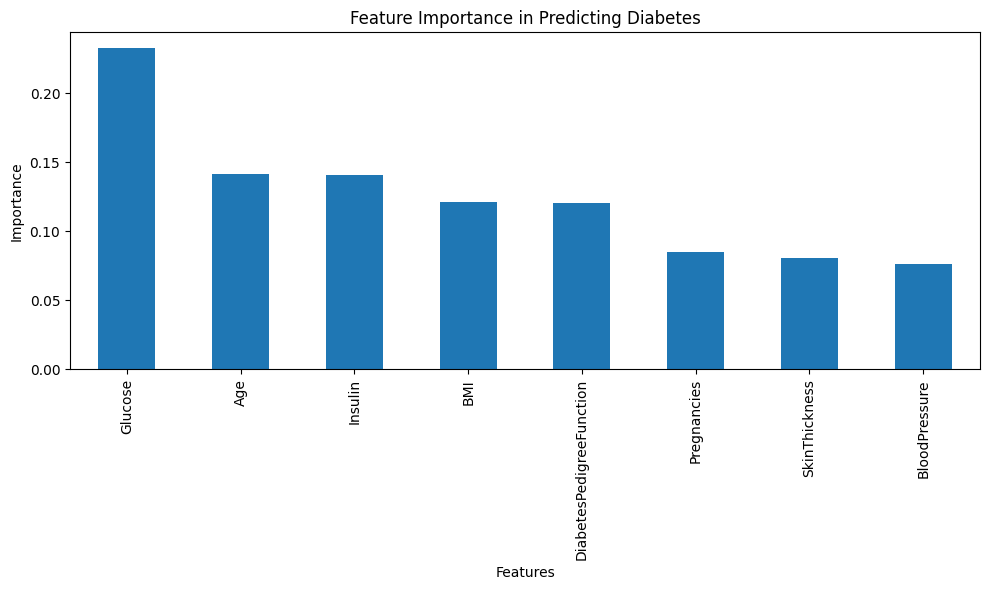

In [12]:
# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).plot(kind="bar", title="Feature Importance in Predicting Diabetes")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()
plt.show()